<a href="https://colab.research.google.com/github/saipragna25/deep-learning-asgn-neural-networks-/blob/main/DL_NN_with_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3 layer Deep Neural Network for non linear Regression using only Numpy from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data preparation

In [2]:
# 3 Dimension non-linear input data

n = 200
d = 3
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[2, 1,-1],[3,0,-1],]).T
bias_true = np.array([0.5,0.1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

x: (200, 3), weights: (3, 2), bias: (2,), y: (200, 2)


plotting the data

In [3]:
from sklearn.manifold import TSNE
view = TSNE(n_components=2, n_jobs=5).fit_transform(x)
view.shape

(200, 2)

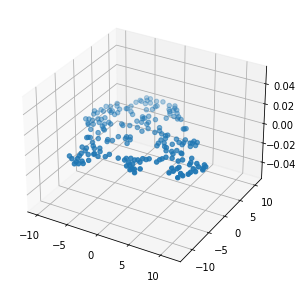

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#y_pred = y_pred.astype('int')
fig = plt.figure(figsize=(10,5))
tsne = fig.add_subplot(111, projection='3d')
tsne.scatter(*zip(*view))
plt.show()


In [6]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    #output = (x ** 2) @ weights_true + x @ weights_true + bias_true
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient
  
  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient


Adding non-linerarity

In [7]:
# In order to learn non-linear functions, we need non-linearities in our model.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


Training the non linear model

In [10]:
class Model:
  def __init__(self, input_dim, num_hidden, output_dim):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu1 = Relu()
    self.relu2 = Relu()
    self.linear2 = Linear(num_hidden, output_dim)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    r2 = self.relu2(r1)
    l2 = self.linear2(r2)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear2_gradient)
    relu1_gradient = self.relu1.backward(relu2_gradient)
    linear1_gradient = self.linear1.backward(relu1_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 10,output_dim=2)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)


3.7817853713491845


array([[-8.65737821e-04, -1.24115002e-03,  2.22998796e-03],
       [-9.70225465e-03, -3.09487881e-03, -2.54552813e-03],
       [ 1.15801353e-04,  1.60559312e-04,  3.15539696e-05],
       [ 1.22830348e-03, -8.39716927e-04,  3.66232212e-03],
       [ 1.54625246e-02, -1.90177370e-02,  9.52424181e-03],
       [ 7.42153033e-03, -8.09918556e-04, -4.56695661e-03],
       [-6.97889369e-03, -1.67635505e-03, -3.88514276e-03],
       [ 1.99908160e-03, -3.94433731e-03, -1.11520325e-03],
       [ 1.26289378e-03,  1.59409223e-04,  1.16305435e-03],
       [ 3.37154459e-02, -3.22939858e-02,  1.14314947e-02],
       [-8.24611852e-03,  2.99230342e-03, -9.46964856e-03],
       [-1.52192732e-02,  1.56671936e-02, -4.78956348e-03],
       [-1.14349821e-03,  5.35162999e-05,  5.44218335e-05],
       [-4.10528535e-03, -9.86104124e-04, -2.28540803e-03],
       [ 9.00984428e-03, -1.31253318e-03, -8.54379607e-03],
       [ 4.08399735e-02, -7.44276307e-02,  7.22861738e-03],
       [ 9.61921586e-03, -1.87569468e-02

In [11]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

Initializing non-linear and loss for data  input and 2-d output with 2 hidden layers, 10 neurons for hidden layers

In [12]:
loss = MSE()
nonlinear = Model(3,20,2)
y_pred = nonlinear(x)
print(x.shape, weights_true.shape, y_true.shape, y_pred.shape)
print(loss(y_pred,y_true))

(200, 3) (3, 2) (200, 2) (200, 2)
4.724860163915454


In [13]:
fit(x, y_true, model=nonlinear, loss=loss, lr=0.1, num_epochs=400)
y_pred = nonlinear(x)
     

Epoch 0, loss 4.724860163915454
Epoch 1, loss 3.0796577904795313
Epoch 2, loss 2.1882346256443026
Epoch 3, loss 1.5951741315899266
Epoch 4, loss 1.214372957077787
Epoch 5, loss 0.9791934992323683
Epoch 6, loss 0.8267756178609216
Epoch 7, loss 0.7178007658233204
Epoch 8, loss 0.6347279837001388
Epoch 9, loss 0.5718083070514479
Epoch 10, loss 0.5193700607559467
Epoch 11, loss 0.476271656702382
Epoch 12, loss 0.4405204244766787
Epoch 13, loss 0.4093970452224937
Epoch 14, loss 0.3817305455419327
Epoch 15, loss 0.35698995129568756
Epoch 16, loss 0.33433767494982336
Epoch 17, loss 0.313468836482727
Epoch 18, loss 0.2940674812809578
Epoch 19, loss 0.2762250222636393
Epoch 20, loss 0.25979572876915996
Epoch 21, loss 0.24449481674542287
Epoch 22, loss 0.230321215025823
Epoch 23, loss 0.21726515299687751
Epoch 24, loss 0.205103359266586
Epoch 25, loss 0.19373341875055658
Epoch 26, loss 0.18302931795358304
Epoch 27, loss 0.1731154343470287
Epoch 28, loss 0.16395202794233765
Epoch 29, loss 0.15524

In [14]:
print(f'x: {x.shape}, y: {y_true.shape}, y1: {y_pred.shape}')
print(y_true)
print(y_pred)

x: (200, 3), y: (200, 2), y1: (200, 2)
[[ 3.12882066e-01 -8.54828262e-01]
 [-1.13932954e+00 -1.70112937e+00]
 [ 4.24636571e-01 -7.23243103e-01]
 [ 1.08779520e+00 -1.51405405e+00]
 [ 5.34312844e-01  5.04721270e-01]
 [ 1.14177643e+00  2.57065340e-01]
 [ 1.27226389e+00 -2.33140990e-01]
 [ 2.98857047e-01 -1.66997813e-01]
 [ 4.13157518e-01 -9.13863529e-01]
 [-3.26705656e-02  4.87208933e-02]
 [ 3.14827056e-01 -1.63478026e+00]
 [ 1.49016764e+00  1.86947374e+00]
 [ 2.86486636e-02 -4.44646378e-01]
 [ 1.11560582e+00 -3.61068999e-01]
 [ 1.08258376e+00  3.89803310e-01]
 [-1.84513763e+00 -2.24910270e+00]
 [ 6.66840830e-01  3.21423790e-01]
 [-6.16918297e-01 -2.09501962e+00]
 [ 4.02582024e+00  3.97022057e+00]
 [ 2.87019307e-01 -1.75075020e+00]
 [ 2.60492296e+00  3.66402988e+00]
 [ 6.92823344e-01  4.11563856e-01]
 [-4.39000416e-01 -1.06710842e+00]
 [ 1.54985295e+00  1.03106644e+00]
 [ 1.31616248e+00  1.54220266e+00]
 [ 6.23336069e-02 -2.77038042e-01]
 [ 2.08854793e+00 -1.56637768e-01]
 [ 4.13110960e-0

plotting the results

Text(0, 0.5, 't-SNE-2')

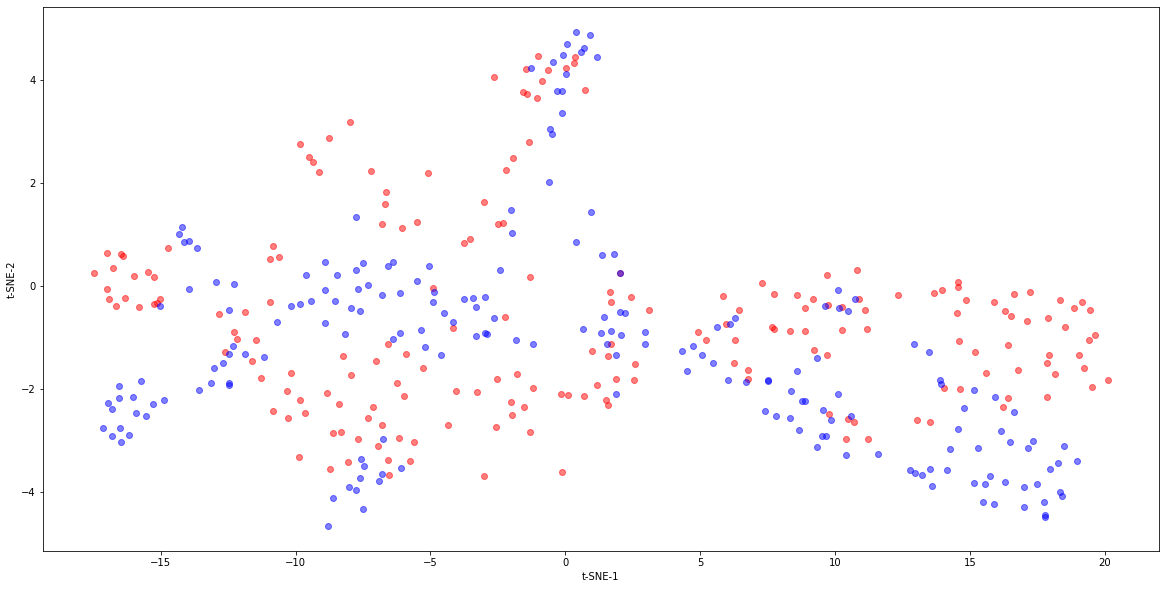

In [16]:
from sklearn.manifold import TSNE
view_true = TSNE(n_components=2, random_state=0).fit_transform(y_true)
view_pred = TSNE(n_components=2, random_state=0).fit_transform(y_pred)
plt.figure(figsize=(20,10))
plt.scatter(view_true[:,0], view_true[:,1], c='r', alpha=0.5)
plt.scatter(view_pred[:,0], view_pred[:,1], c='b', alpha=0.5)
plt.xlabel('t-SNE-1')
plt.ylabel('t-SNE-2')